In [1]:
import sys
from pathlib import Path
sys.path.append("..\..")

from src.data.matchers.kmer_matcher import KMerMelodyMatcher
from src.data.structures.melody import Melody

In [2]:
MIN_LENGTH = 7
K = 5
MAX_DISTANCE = 0.3
MAX_GAP = 1

Similarity: 0.50


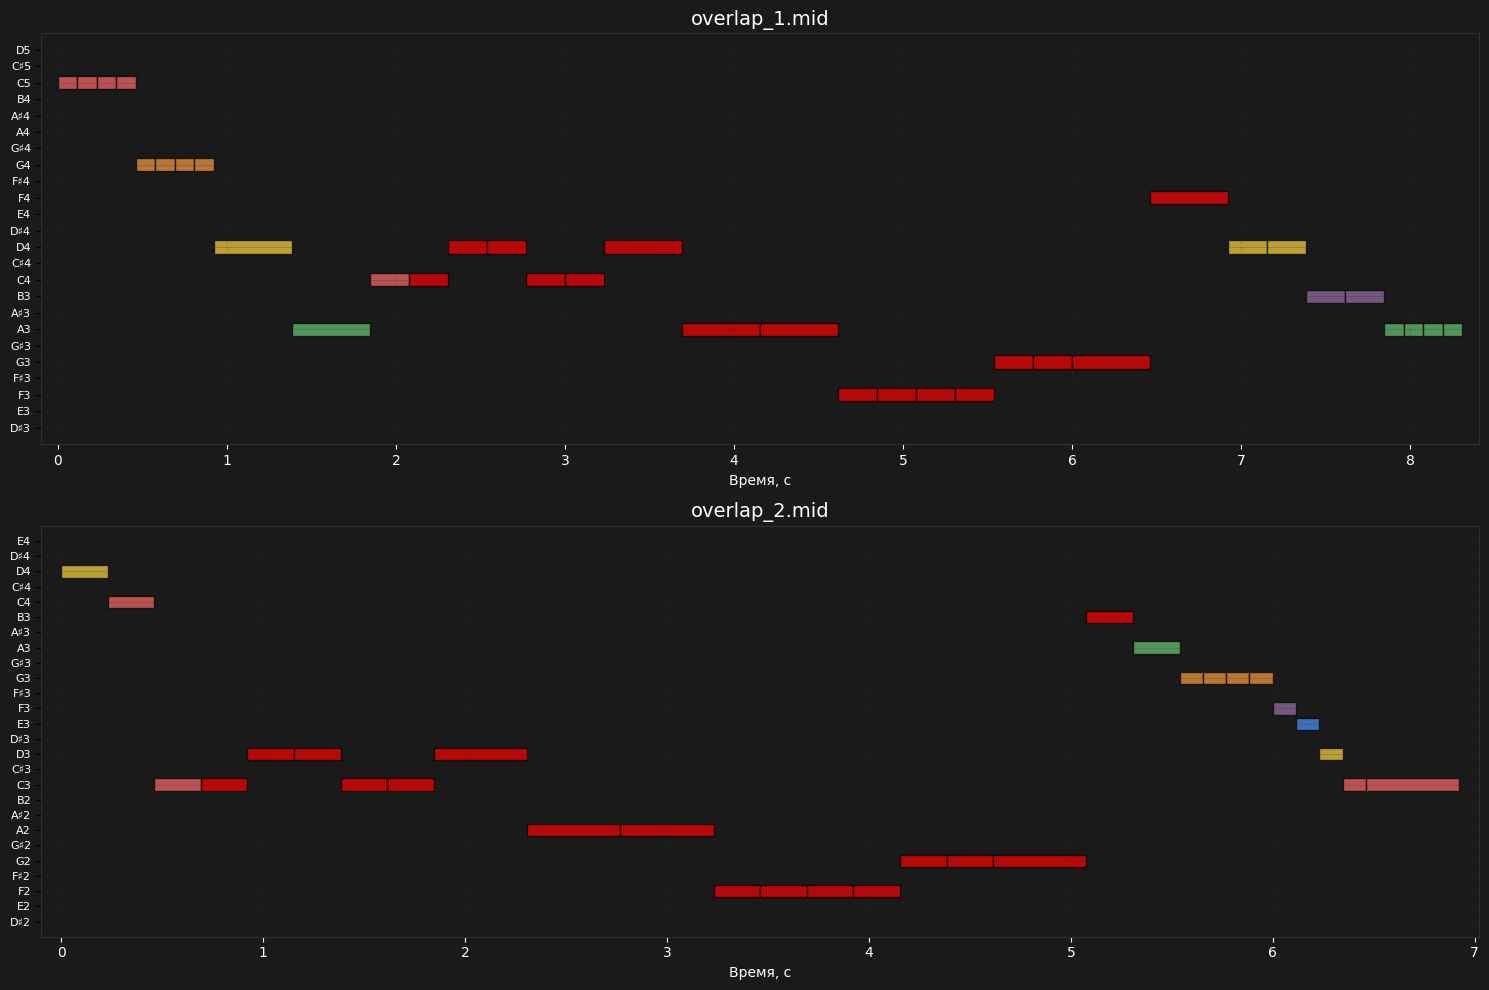

Similarity: 0.51


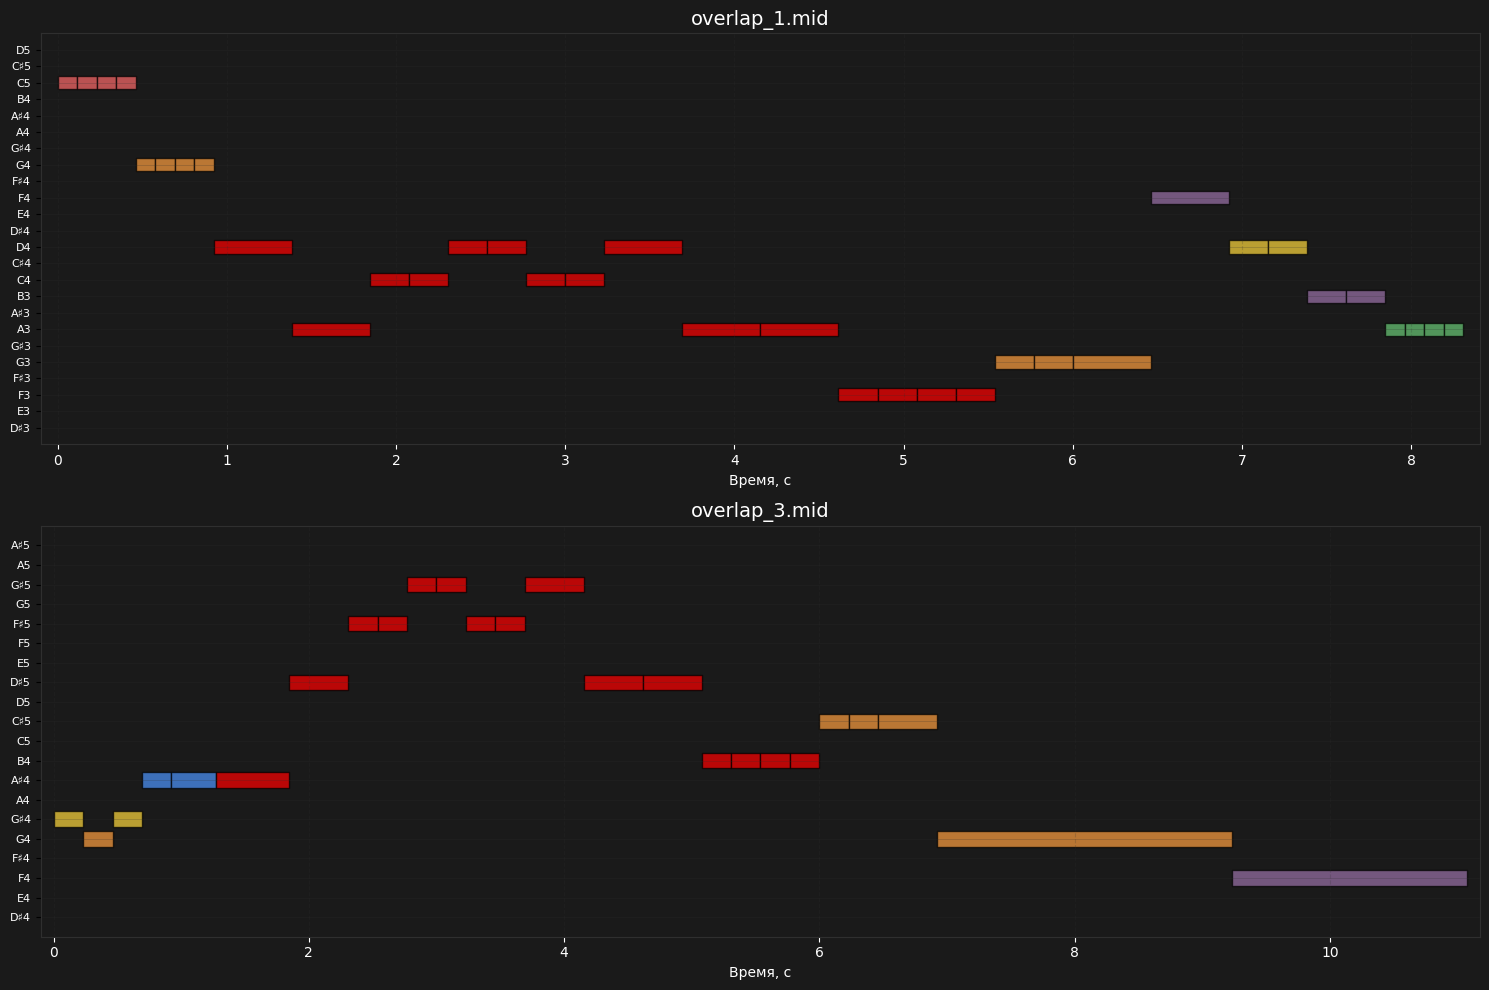

Similarity: 0.68


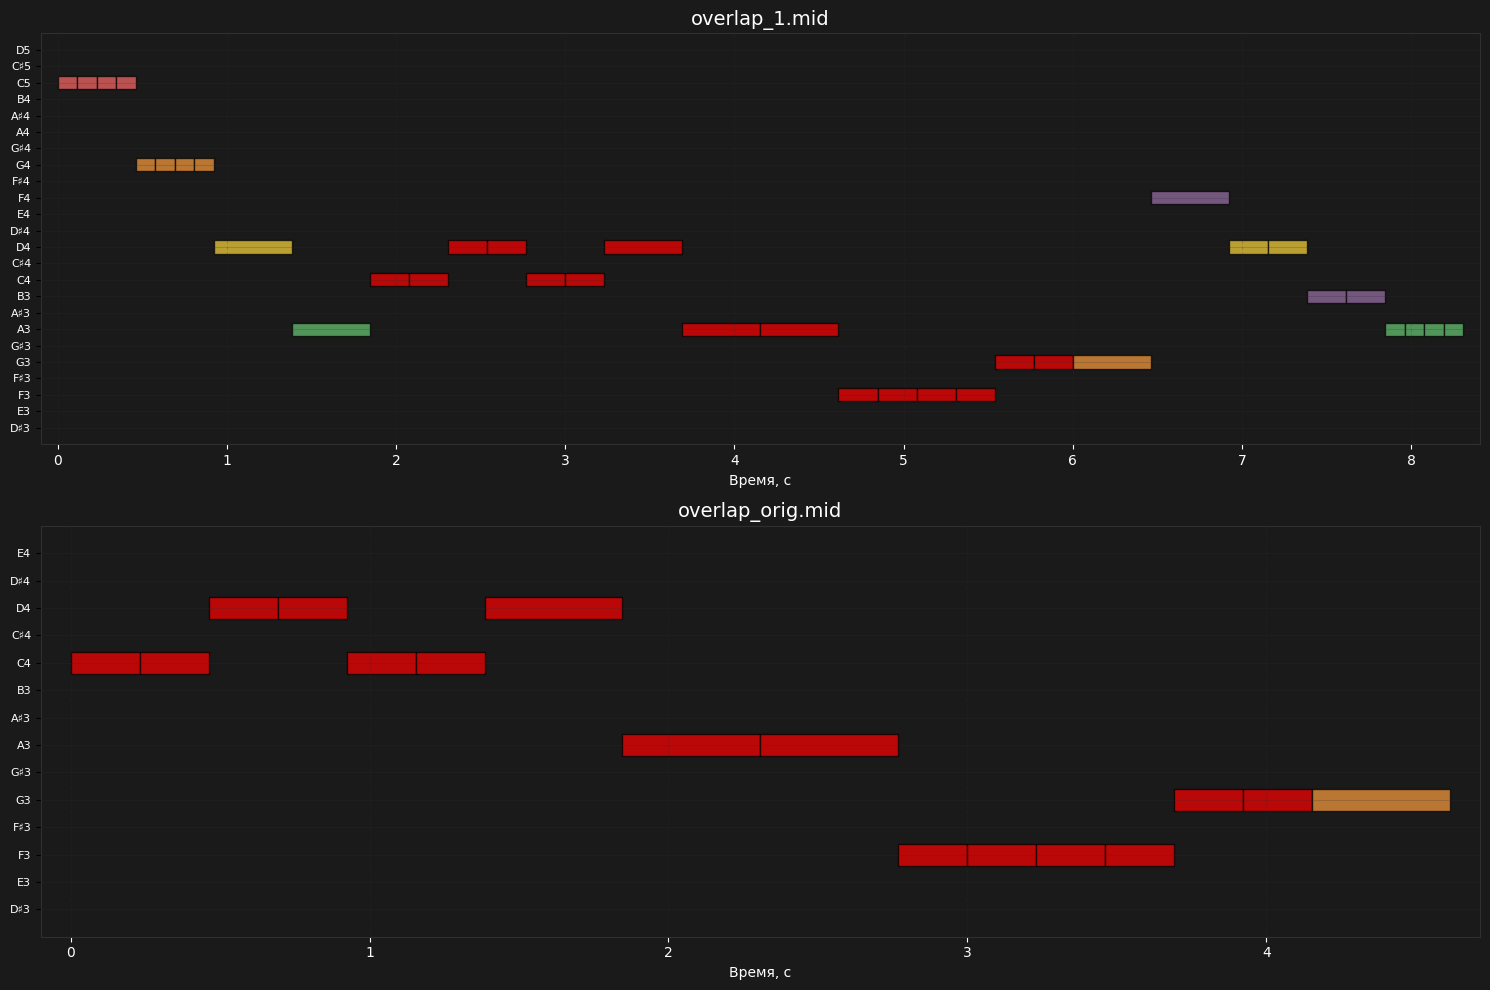

In [3]:
base_melody_path = Path("..\\..\\datasets\\MelodyNet\\test\\labels\\overlap_1.mid")
base_melody = Melody.from_midi(base_melody_path)

overlap_files = sorted([
    f for f in Path("..\\..\\datasets\\MelodyNet\\test\\labels").glob("overlap_*.mid") 
    if f.name != base_melody_path.name
])

for overlap_file in overlap_files:

    melody2 = Melody.from_midi(overlap_file)
    
    matcher = KMerMelodyMatcher(base_melody, melody2)
    patterns = matcher.find_patterns(min_length=MIN_LENGTH, k=K, max_distance=MAX_DISTANCE, max_gap=MAX_GAP)
        
    print(f"Similarity: {matcher.calculate_similarity():.2f}")
    matcher.visualize_matches(subplot_titles=(base_melody_path.name, overlap_file.name), subplot_title_fontsize=14)

Similarity: 0.00


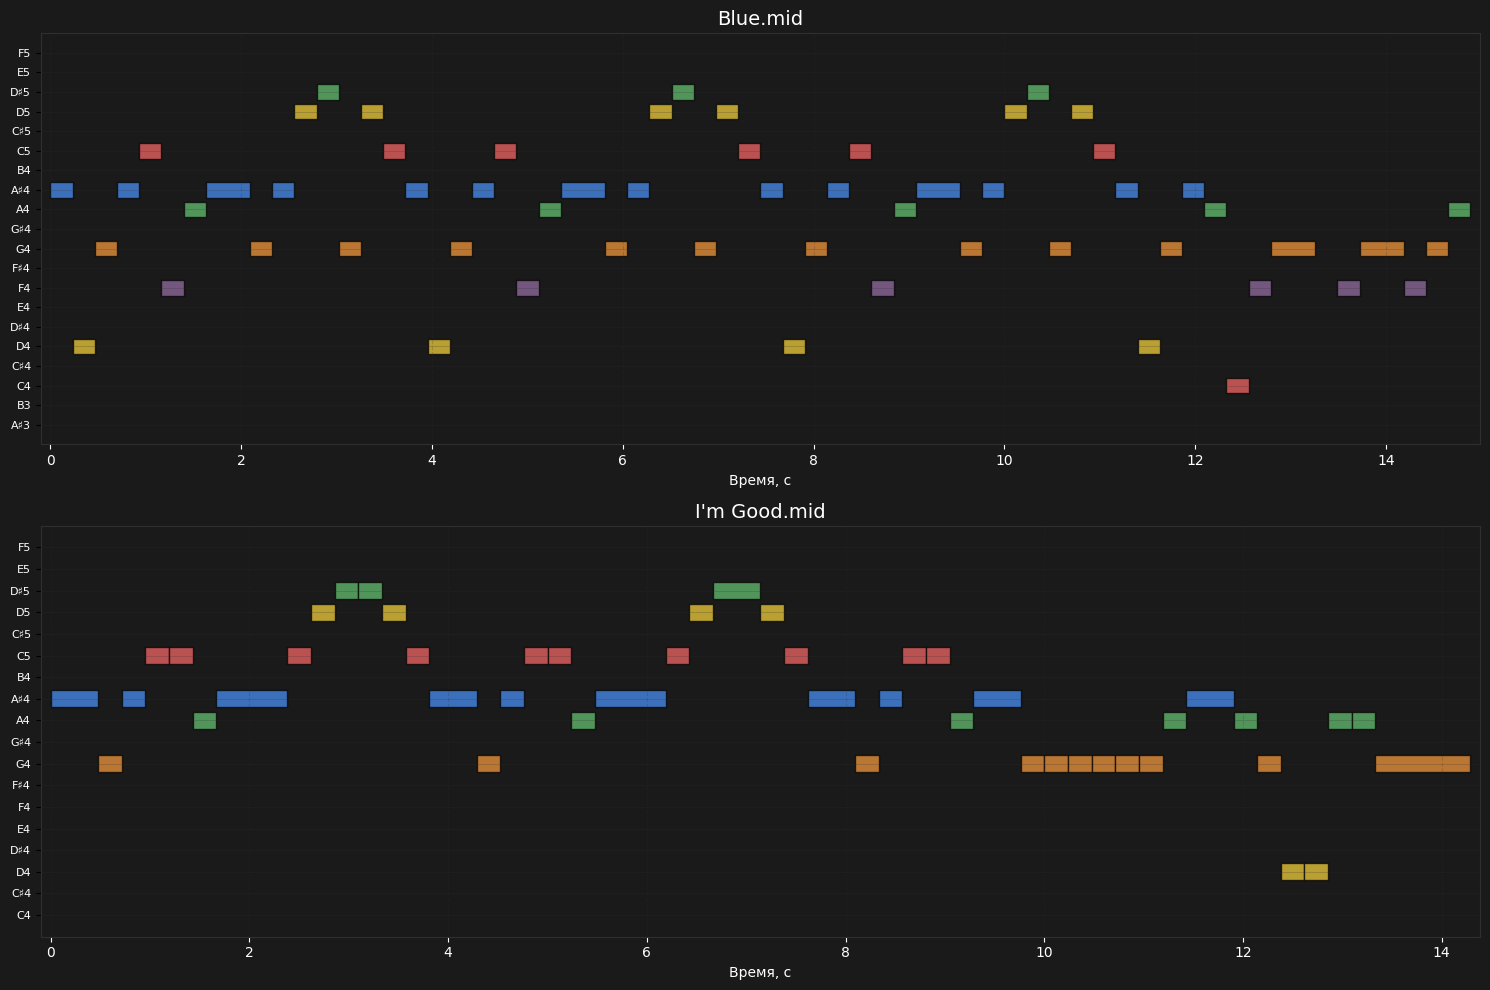

Similarity: 0.00


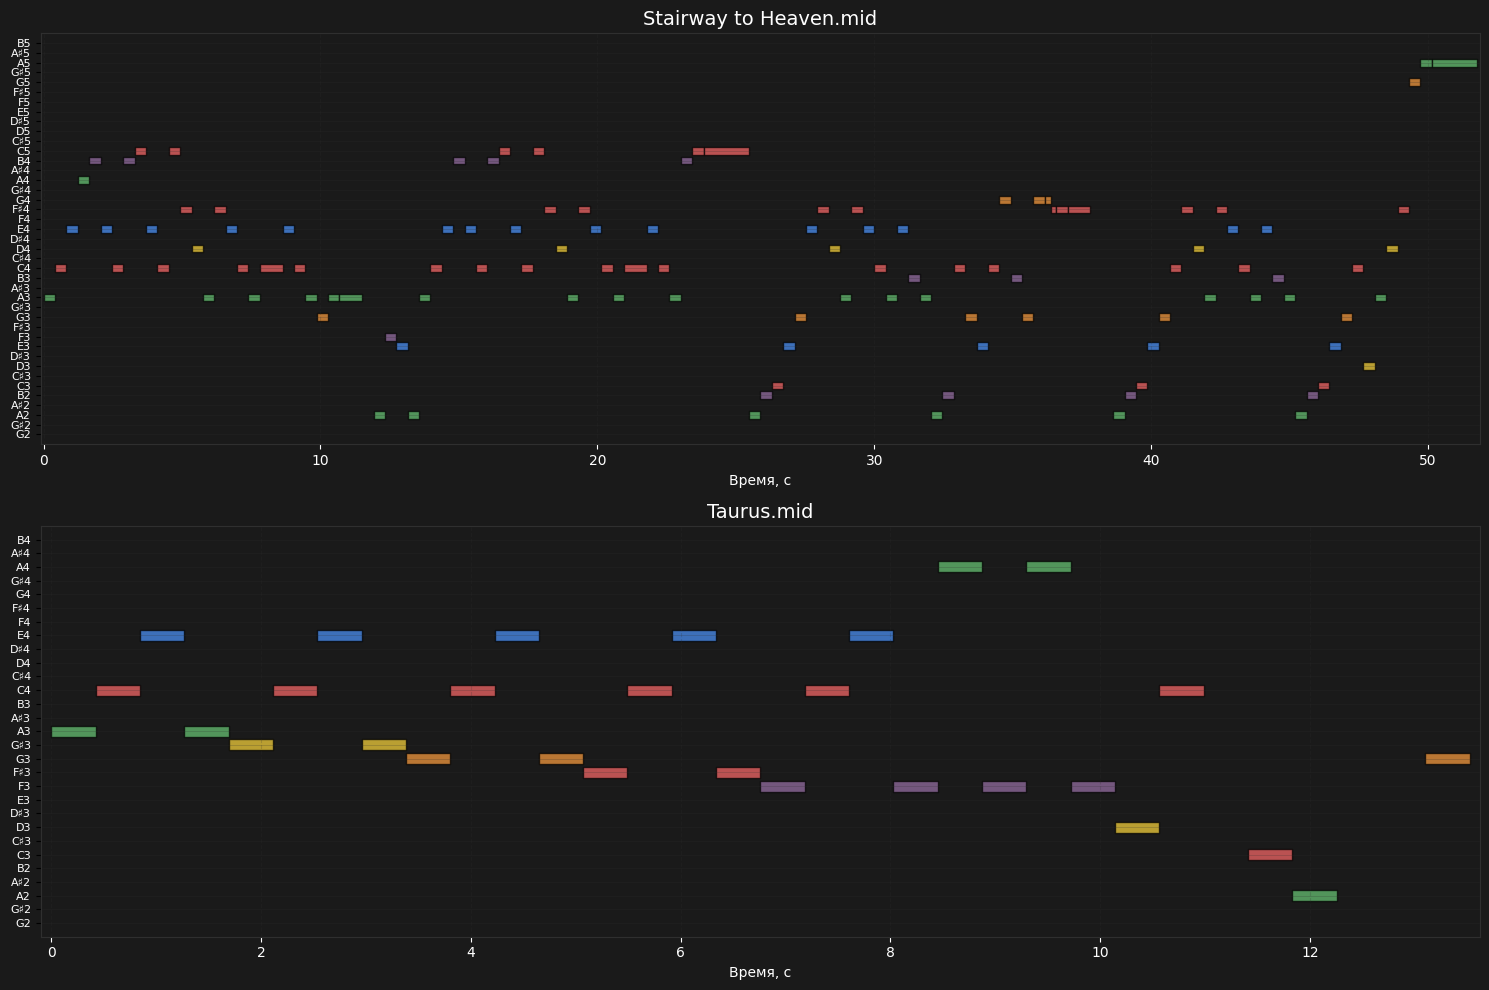

Similarity: 0.41


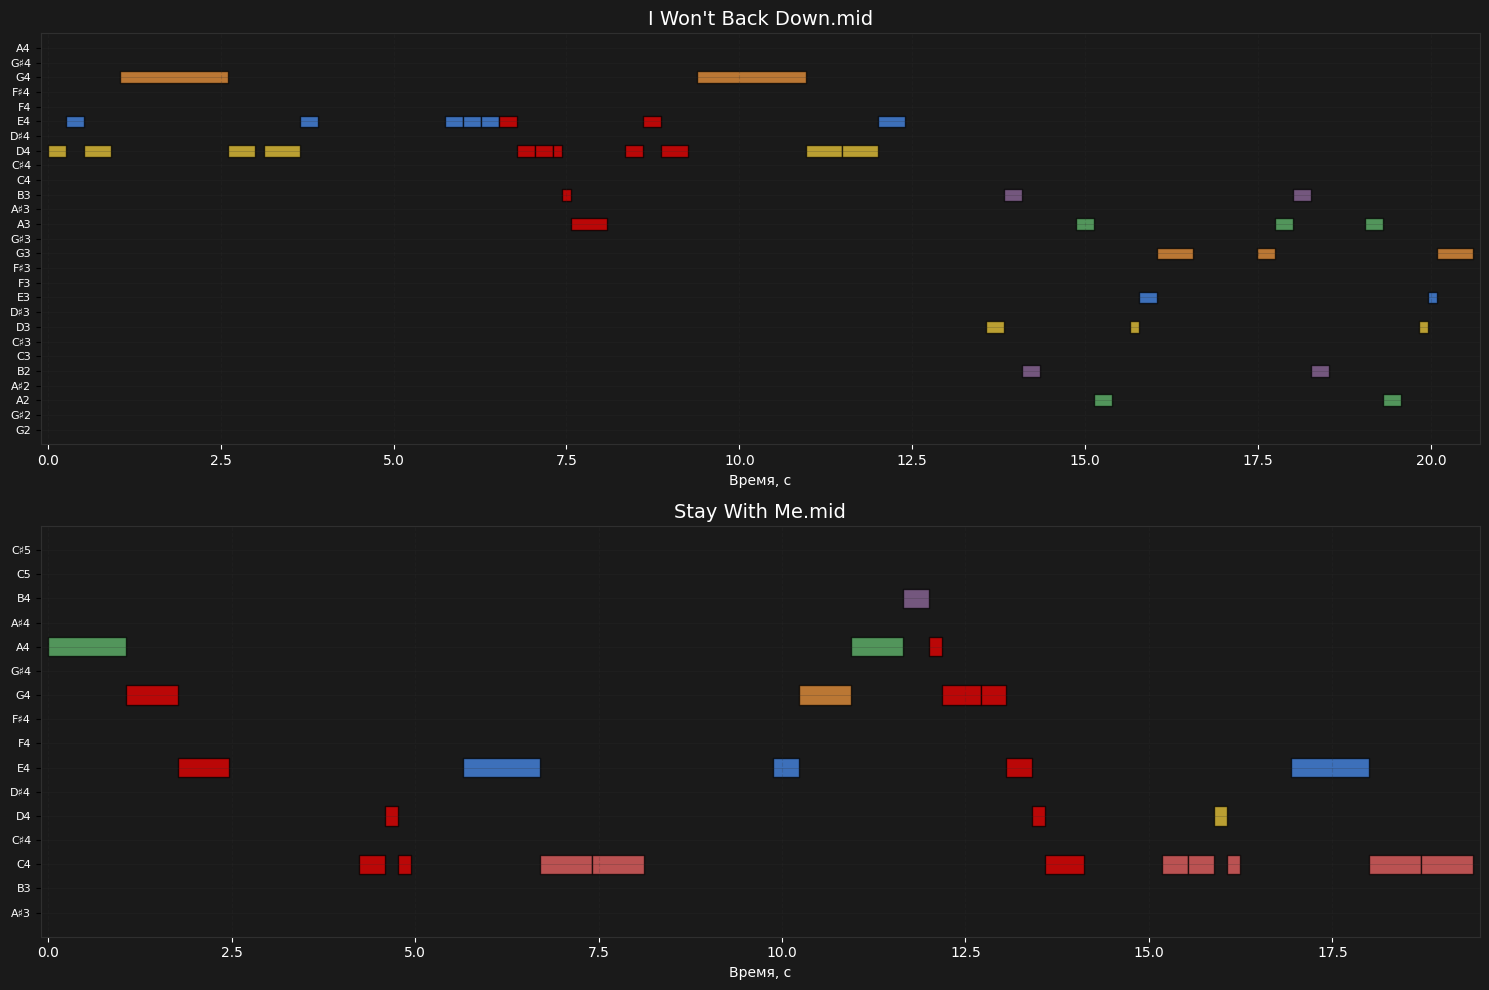

Similarity: 0.00


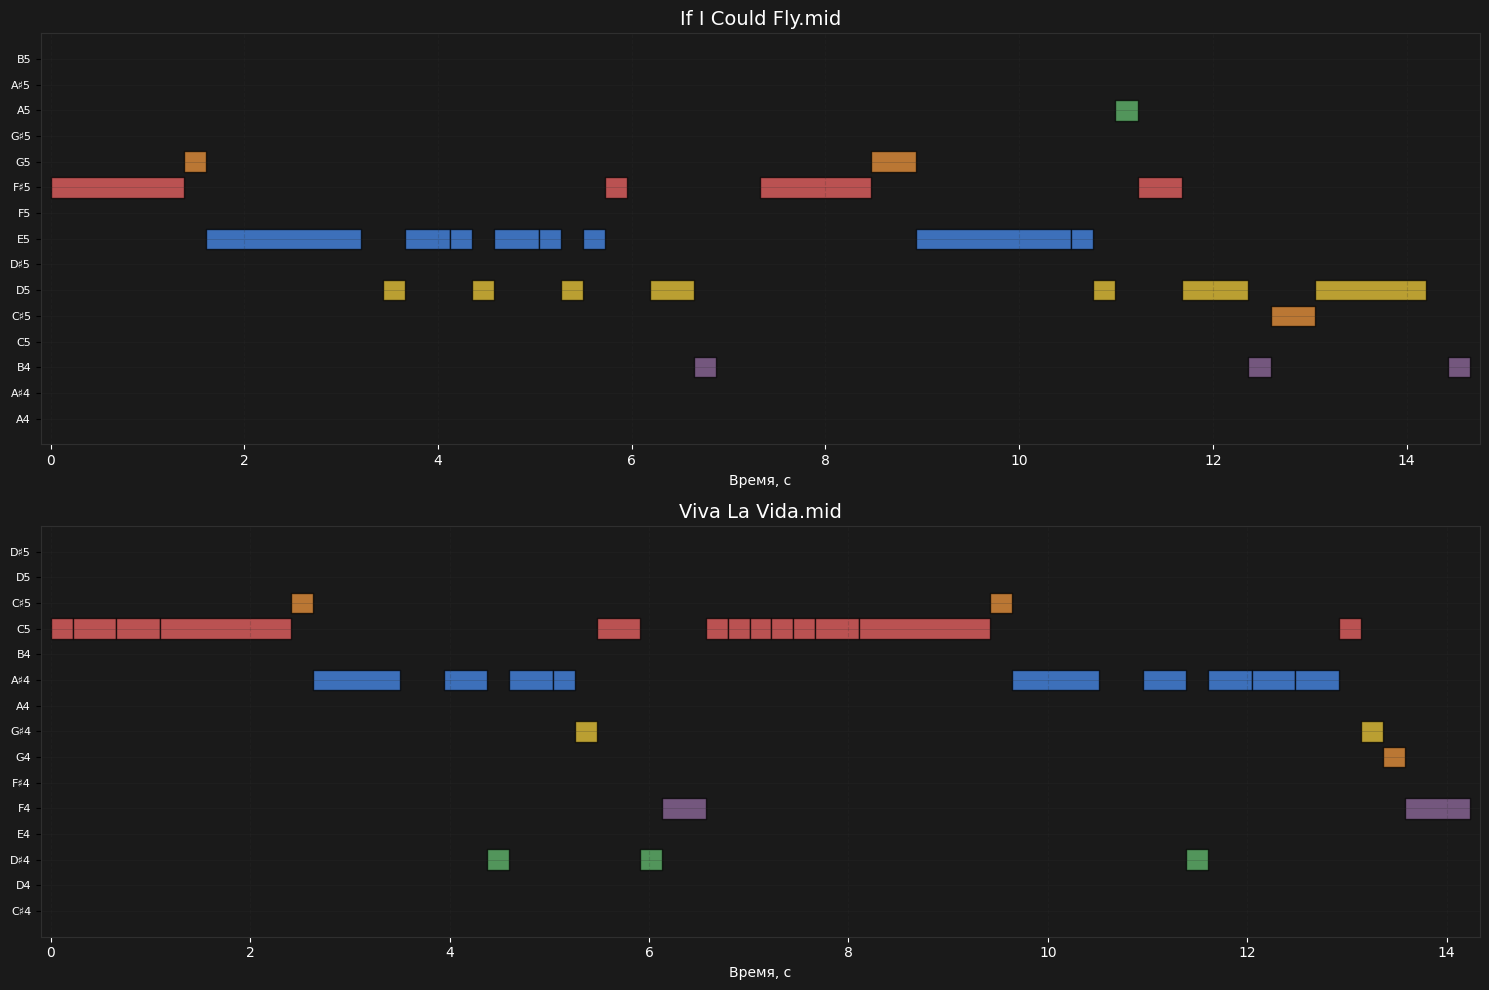

Similarity: 0.00


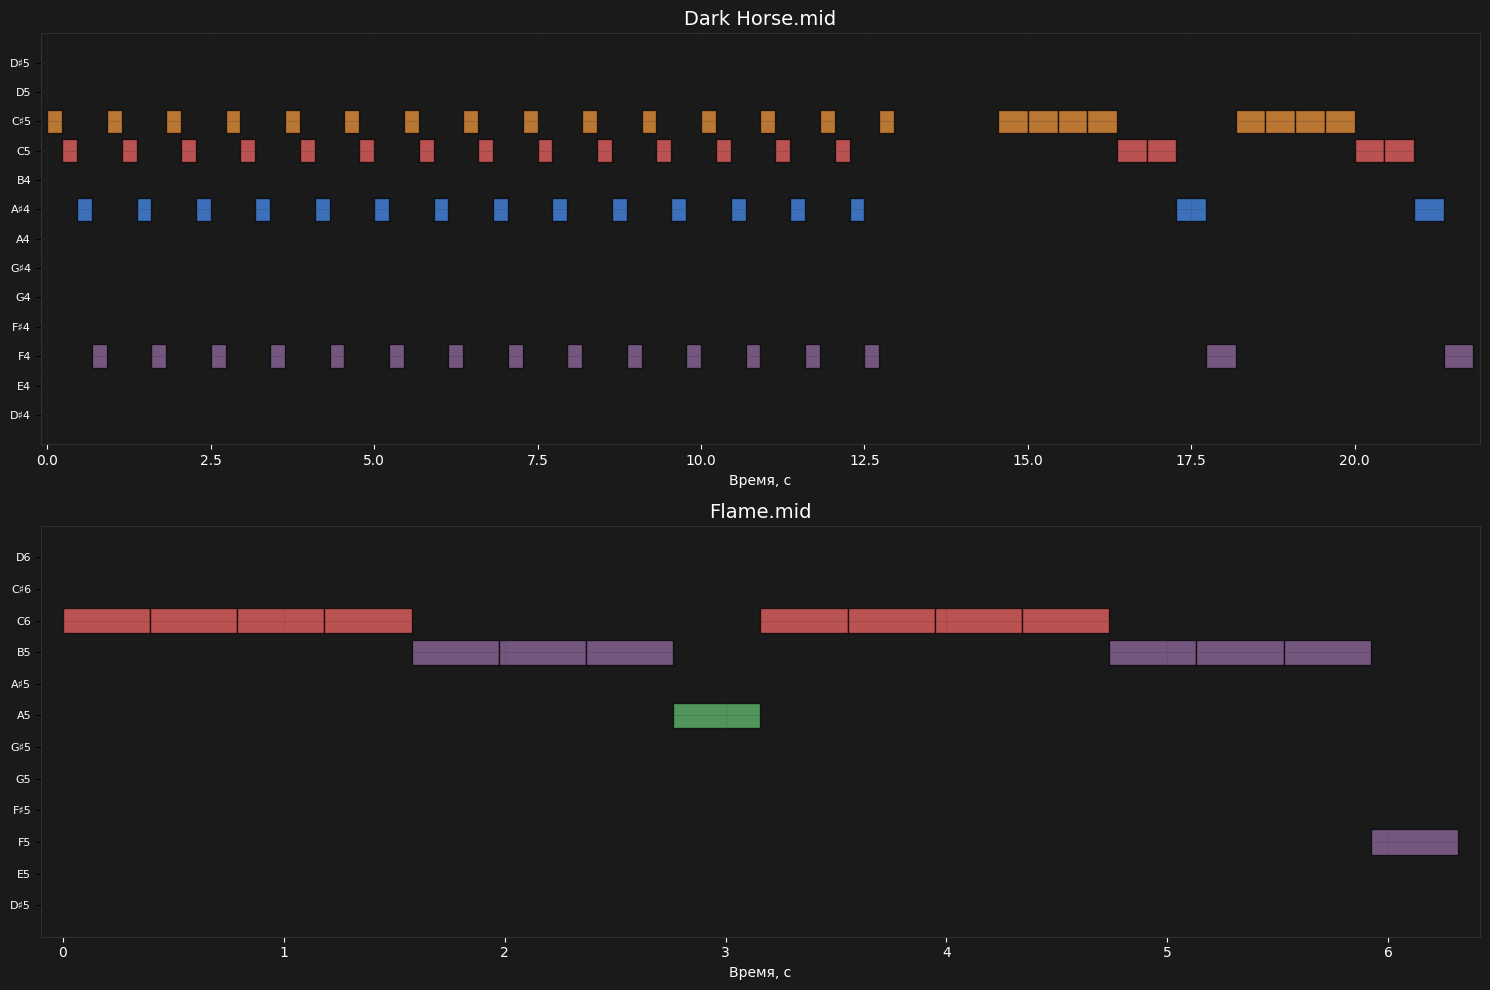

Similarity: 0.29


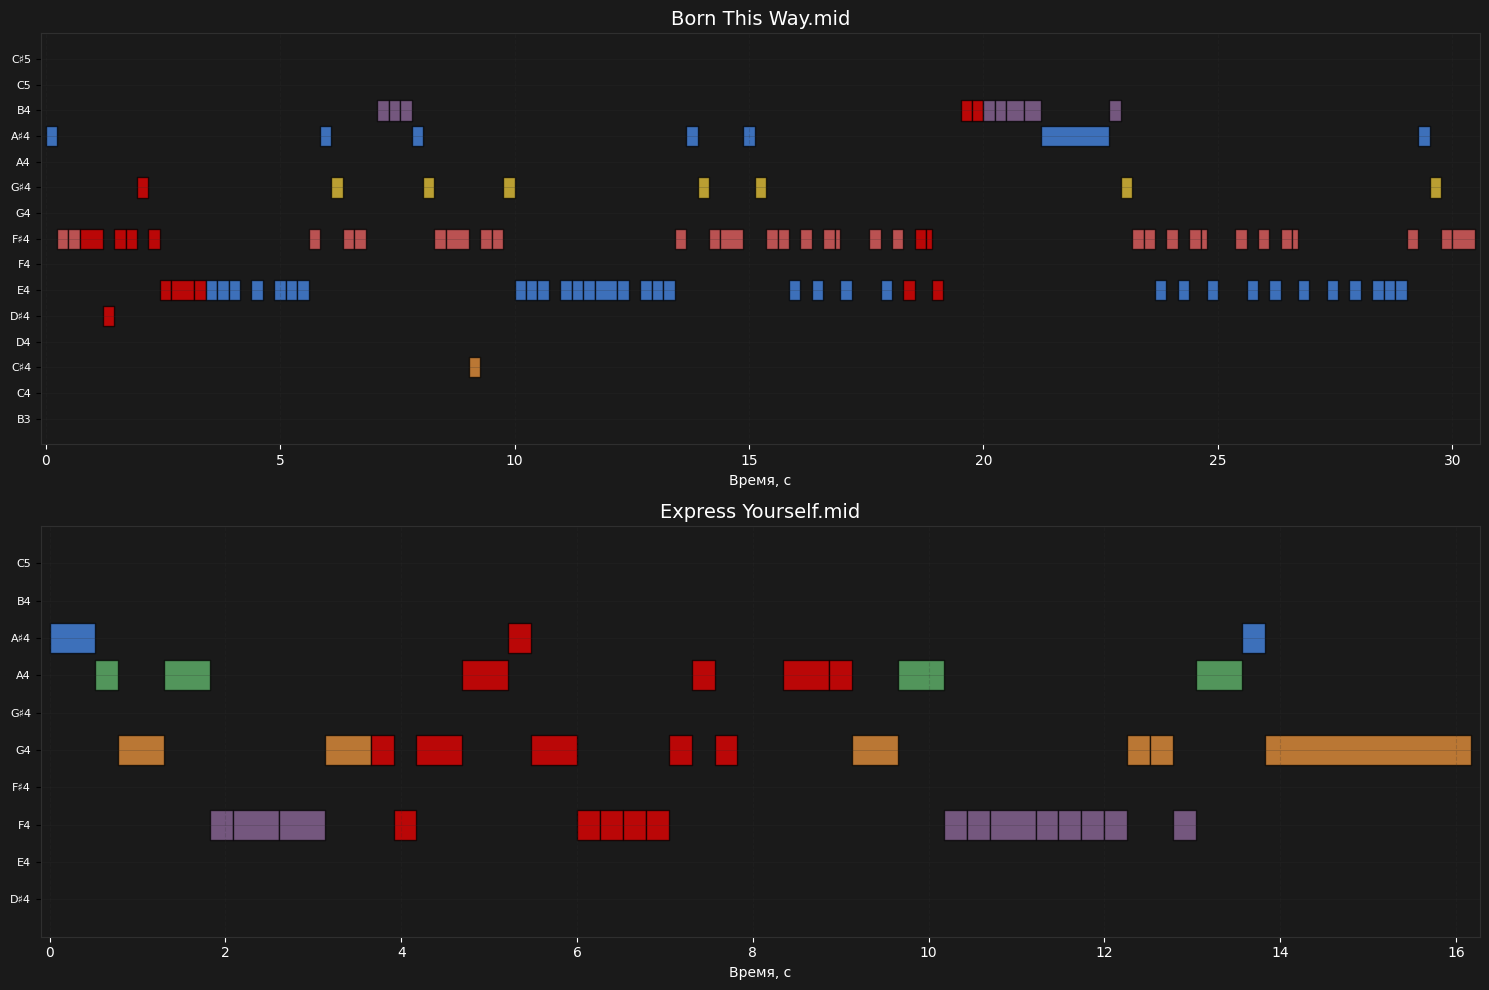

Similarity: 0.00


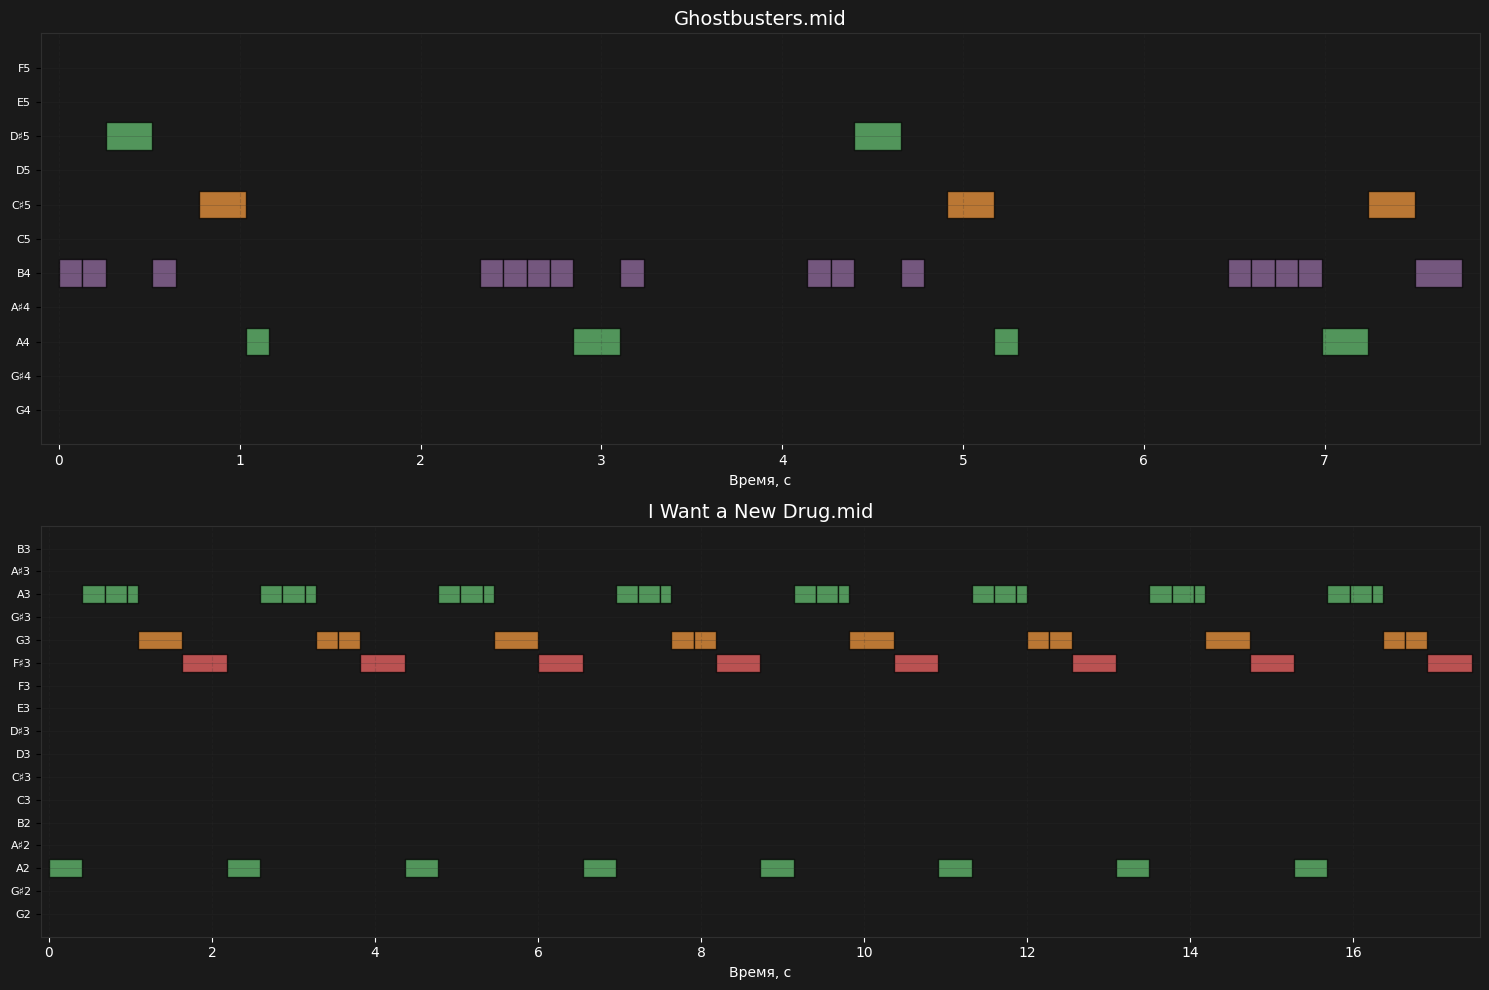

Similarity: 0.00


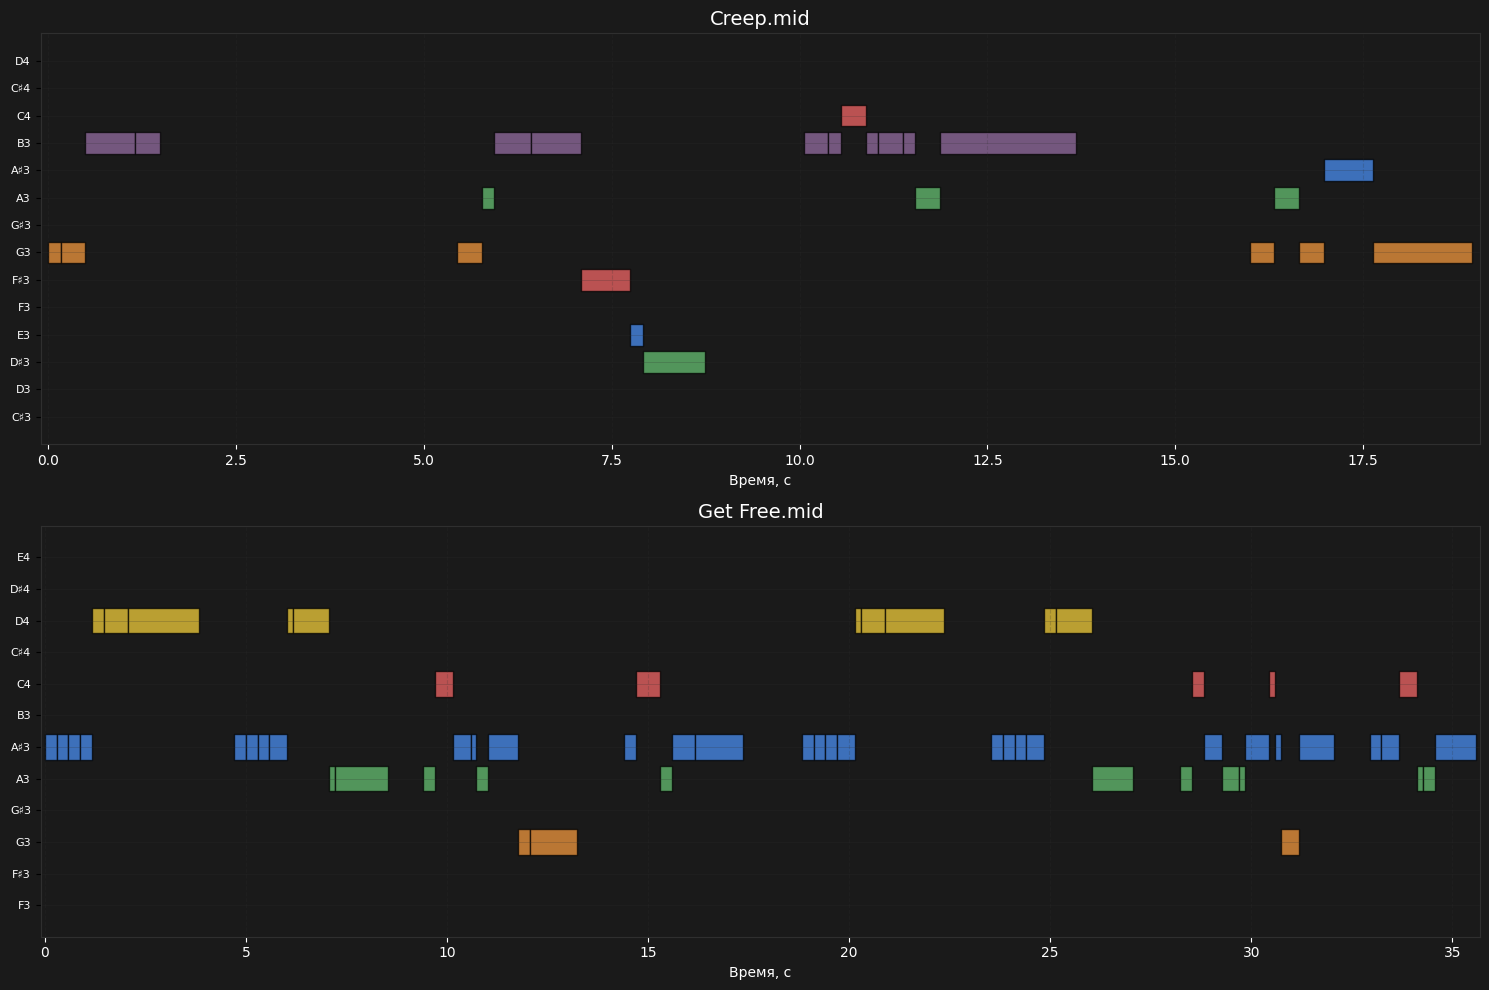

In [4]:
for case_dir in sorted(Path("..\\..\\datasets\\PlagiNet\\melodies").iterdir()):

    if case_dir.is_dir():
        midi_files = list(case_dir.glob("*.mid"))

        melody1 = Melody.from_midi(midi_files[0])
        melody2 = Melody.from_midi(midi_files[1])
        
        matcher = KMerMelodyMatcher(melody1, melody2)
        patterns = matcher.find_patterns(min_length=MIN_LENGTH, k=K, max_distance=MAX_DISTANCE, max_gap=MAX_GAP)
        
        print(f"Similarity: {matcher.calculate_similarity():.2f}")
        matcher.visualize_matches(subplot_titles=(midi_files[0].name, midi_files[1].name), subplot_title_fontsize=14)